# 1.1 - Intro Machine Learning - Aprendizaje Supervisado - Regresion

![venn_ml](images/venn_ml.png)

![ext_sklearn](images/ext_sklearn.jpeg)

![sklearn](images/sklearn.png)

### WorkFlow


1. [Obtener datos](#1.-Obtener-Datos)
2. [Definir objetivo](#2.-Definir-Objetivo)
3. [Limpieza de datos (unidades, outliers, one-hot, etc..)(**)](#3.-Limpieza-de-Datos)
4. [Definir modelo (regresión, clasificación, ...)](#4.-Modelo)
5. [Entrenar (hiperparámetros, validación, ...) (**)](#5.-Entrenamiento)
6. [Predecir (testear)](#6.-Predicción)
7. [Evaluación](#7.-Evaluación)
8. [Si hay mucho error volver a (**)](#WorkFlow)
9. [Super-Bonus H2O](#8.-H2O)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

### 1. Obtener Datos

**explicacion:**
    
+ carat:	peso del diamante (quilates)

+ cut:	calidad del corte (Fair, Ideal, Good, Very Good, Premium)

+ color: color (D (mejor) a J (peor))

+ clarity: claridad (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)) 

+ table: ancho del corte superior del diamante

+ x: largo en mm

+ y: ancho en mm

+ z: alto en mm

+ depth:	2*z/(x+y)

+ price:	precio en dolares USA


![dia](images/dia.jpg)

In [2]:
df=pd.read_csv('../data/diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


### 2. Definir Objetivo


```El objetivo del ejercicio consiste en predecir el precio de los diamantes basándonos en datos como el peso, el color, el corte o la claridad.```

### 3. Limpieza de Datos

El proceso de limpieza es el habitual:

+ Valores nulos
+ Datos inconsistentes 
+ Datos duplicados...

Todo esto implica realizar también un **EDA**. Además de eso, es necesario arreglar los datos, proceso llamado `data wrangling`. Este proceso consiste en preparar los datos de manera adecuada para que el modelo de machine learning "entienda" los datos de manera óptima. Por ejemplo, los datos de corte, color y claridad son datos categóricos que están en formato string, habrá que cambiar estos datos para alimentar al modelo, las máquinas solo entienden de números 🤣.

Este proceso no es solo necesario sino fundamental. **Todo está en los datos.**

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.2 MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,40455.0,NaN,NaN,NaN,0.797706,0.475544,0.2,0.4,0.7,1.04,4.5
cut,40455,5,Ideal,16220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,40455,7,G,8455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,40455,8,SI1,9749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,40455.0,NaN,NaN,NaN,61.752841,1.431725,43.0,61.0,61.8,62.5,79.0
table,40455.0,NaN,NaN,NaN,57.446133,2.233535,43.0,56.0,57.0,59.0,95.0
price,40455.0,NaN,NaN,NaN,3928.444469,3992.416147,326.0,945.0,2397.0,5331.0,18823.0
x,40455.0,NaN,NaN,NaN,5.729392,1.124453,0.0,4.71,5.69,6.54,10.23
y,40455.0,NaN,NaN,NaN,5.732819,1.14665,0.0,4.72,5.71,6.54,58.9
z,40455.0,NaN,NaN,NaN,3.537154,0.697062,0.0,2.91,3.52,4.035,8.06


In [7]:
df['vol']=df.x * df.y * df.z

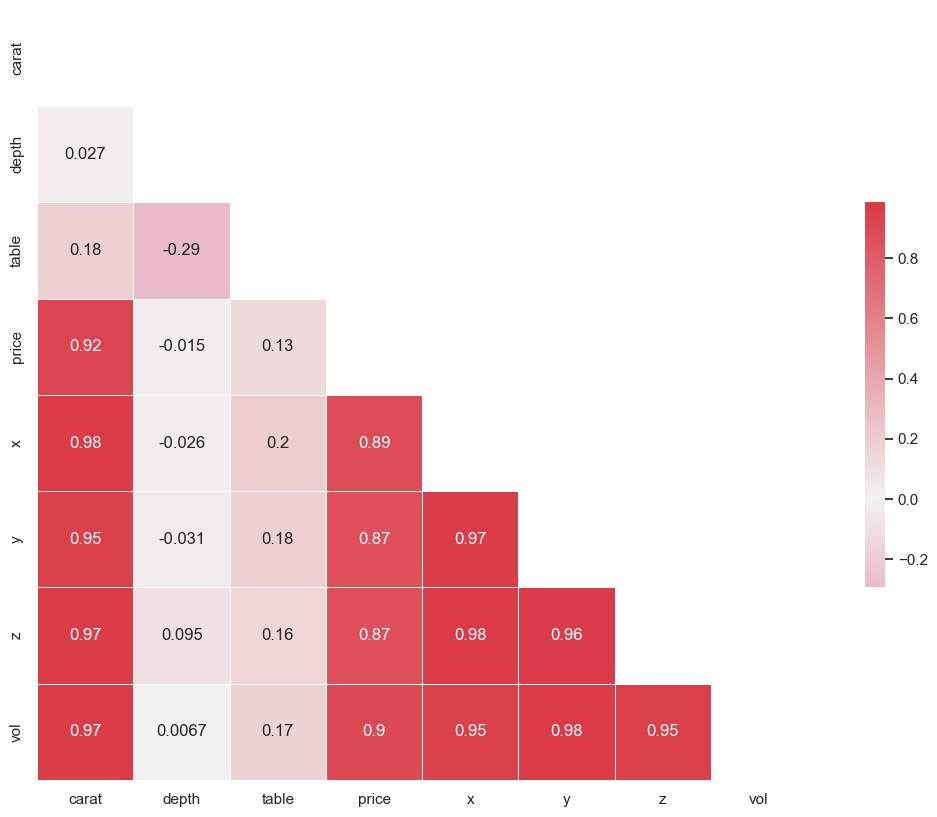

In [8]:
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

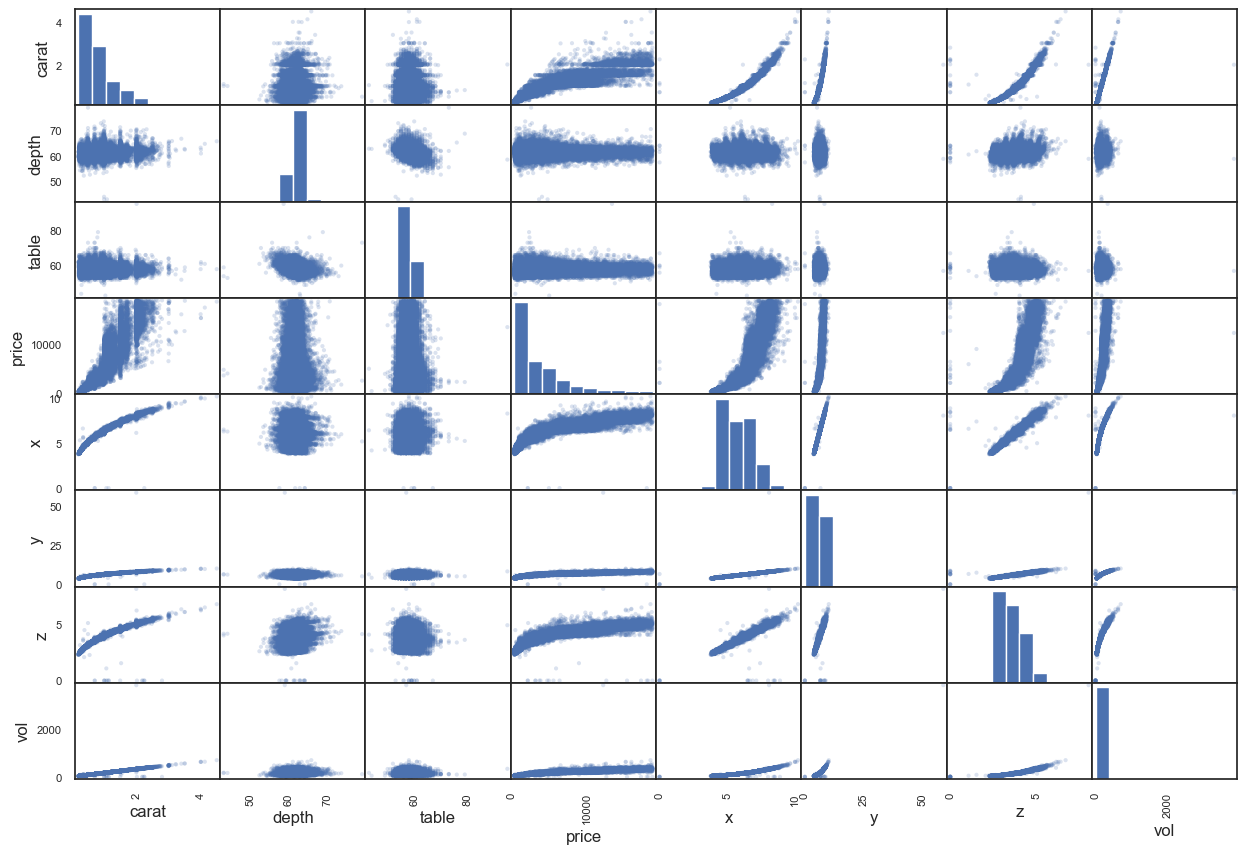

In [9]:
# scatter matrix

pd.plotting.scatter_matrix(df, figsize=(15, 10), alpha=0.2);

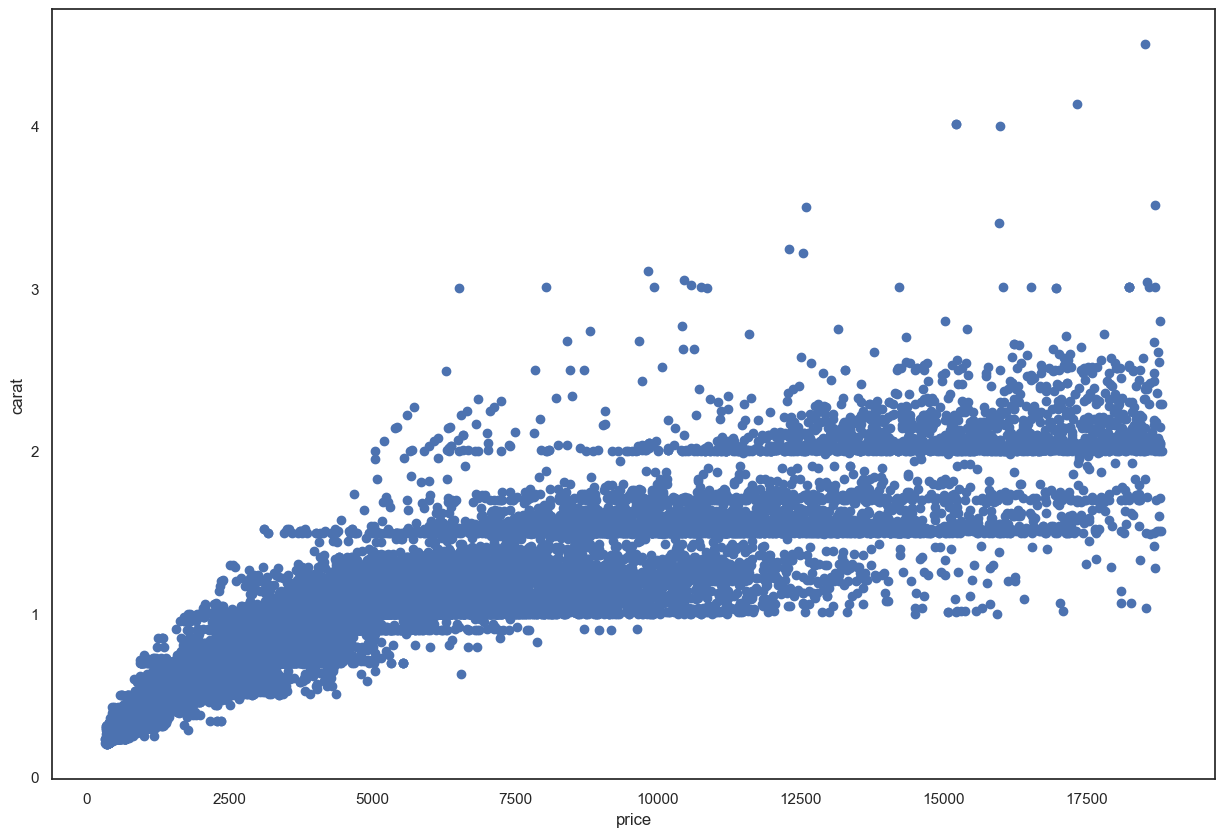

In [10]:
plt.figure(figsize=(15,10))

plt.scatter(df.price, df.carat)

plt.ylabel('carat')
plt.xlabel('price');

In [11]:
# transformando carat con boxcox

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

from scipy.stats import boxcox

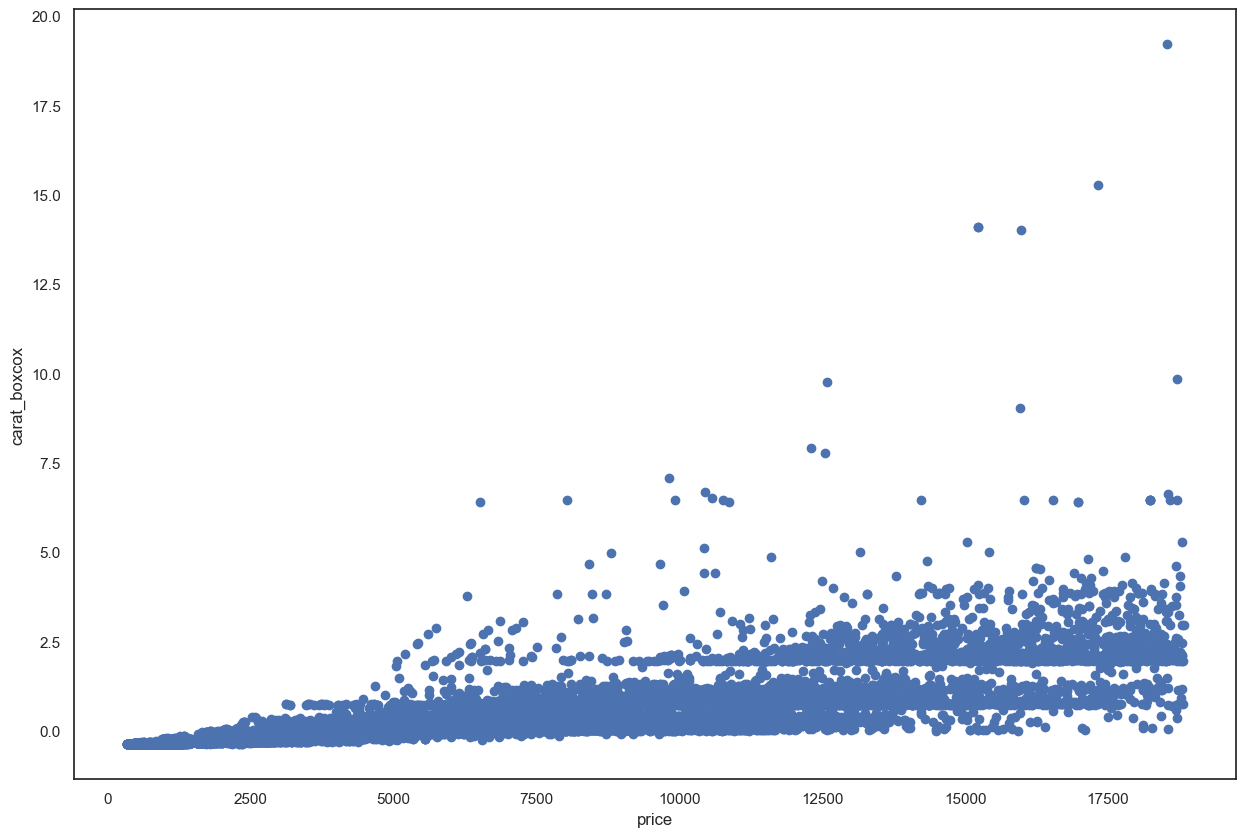

In [12]:
plt.figure(figsize=(15,10))


carat_boxcox=boxcox(df.carat, lmbda=2.618033)

plt.scatter(df.price, carat_boxcox)
plt.xlabel('price')
plt.ylabel('carat_boxcox');

## Reflexión : ¿Cómo podemos asegurarnos de que de verdad son diamantes?

1 carat es igual a 200mg de diamante.

Densidad del diamante es 2,26 gm/cm3

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975


In [14]:
df2=df.copy()

df2['gr'] = 0.226 * df2.carat

df2['vol']=df2.x * df2.y * df2.z / 2.5 / 1000

df2['density']= df2.gr / df2.vol

df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol,gr,density
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,0.078839,0.27346,3.468602
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,0.020958,0.07232,3.450662
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,0.045375,0.16046,3.536328
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,0.026508,0.09266,3.495612
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,0.067372,0.23052,3.421600


In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797706,0.475544,0.200000,0.400000,0.700000,1.040000,4.500000e+00
depth,40455.0,61.752841,1.431725,43.000000,61.000000,61.800000,62.500000,7.900000e+01
table,40455.0,57.446133,2.233535,43.000000,56.000000,57.000000,59.000000,9.500000e+01
price,40455.0,3928.444469,3992.416147,326.000000,945.000000,2397.000000,5331.000000,1.882300e+04
x,40455.0,5.729392,1.124453,0.000000,4.710000,5.690000,6.540000,1.023000e+01
y,40455.0,5.732819,1.146650,0.000000,4.720000,5.710000,6.540000,5.890000e+01
z,40455.0,3.537154,0.697062,0.000000,2.910000,3.520000,4.035000,8.060000e+00
vol,40455.0,0.051921,0.031562,0.000000,0.025956,0.045876,0.068338,1.536239e+00
gr,40455.0,0.180281,0.107473,0.045200,0.090400,0.158200,0.235040,1.017000e+00
density,40455.0,inf,NaN,0.294225,3.417042,3.456033,3.497369,inf


In [16]:
df2[df2.density > 4].shape

(28, 13)

In [17]:
df.shape

(40455, 11)

## Separación de datos.

![X_y_tts](images/X_y_tts.png)

Antes de transformar definitivamente nada, vamos a separar los datos en X e y. y será la columna objetivo, es decir, el precio. La columna objetivo nunca se toca, nunca se transforma en ningún sentido. X serán el resto de columnas, la características con las que realizaremos nuestras predicciones.

**0 arreglar datos**

In [18]:
X = df.drop('price', axis=1)

y = df.price

X.head()

,carat,cut,color,clarity,depth,table,x,y,z,vol
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,168.429975


In [19]:
# transformacion boxcox

X.carat=boxcox(X.carat, lmbda=2.618033)

X.head()

,carat,cut,color,clarity,depth,table,x,y,z,vol
0,0.247192,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,197.096725
1,-0.362625,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,52.395750
2,-0.226149,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,113.436890
3,-0.344959,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,66.268800
4,0.020325,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,168.429975


In [ ]:
%pip install scikit-learn

In [20]:
# normalizacion, Normal(0, 1)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X[['depth', 'x', 'y', 'z']]=scaler.fit_transform(X[['depth', 'x', 'y', 'z']])

X.head()

,carat,cut,color,clarity,depth,table,x,y,z,vol
0,0.247192,Premium,J,VS2,0.452019,58.0,0.978807,0.921985,1.022657,197.096725
1,-0.362625,Very Good,H,VS2,0.871099,57.0,-1.226738,-1.179816,-1.129259,52.395750
2,-0.226149,Fair,G,VS1,2.617265,55.0,-0.097286,-0.176882,0.161891,113.436890
3,-0.344959,Good,D,SI1,1.429872,56.0,-0.933258,-0.883296,-0.770607,66.268800
4,0.020325,Ideal,G,SI1,-0.875068,59.0,0.729794,0.677793,0.592274,168.429975


**transformando categoricas de varias maneras**

In [22]:
# one-hot encoding , variables dummies (esto funciona muy bien en regresion)

X=pd.get_dummies(X, columns=['cut'], drop_first=True)

X.head()

,carat,color,clarity,depth,table,x,y,z,vol,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.247192,J,VS2,0.452019,58.0,0.978807,0.921985,1.022657,197.096725,0,0,0,1,0
1,-0.362625,H,VS2,0.871099,57.0,-1.226738,-1.179816,-1.129259,52.395750,0,0,0,0,1
2,-0.226149,G,VS1,2.617265,55.0,-0.097286,-0.176882,0.161891,113.436890,1,0,0,0,0
3,-0.344959,D,SI1,1.429872,56.0,-0.933258,-0.883296,-0.770607,66.268800,0,1,0,0,0
4,0.020325,G,SI1,-0.875068,59.0,0.729794,0.677793,0.592274,168.429975,0,0,1,0,0


In [26]:
# label encoder

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

X.clarity=LabelEncoder().fit_transform(X.clarity)

X.head()

,carat,color,clarity,depth,table,x,y,z,vol,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.247192,J,5,0.452019,58.0,0.978807,0.921985,1.022657,197.096725,0,0,0,1,0
1,-0.362625,H,5,0.871099,57.0,-1.226738,-1.179816,-1.129259,52.395750,0,0,0,0,1
2,-0.226149,G,4,2.617265,55.0,-0.097286,-0.176882,0.161891,113.436890,1,0,0,0,0
3,-0.344959,D,2,1.429872,56.0,-0.933258,-0.883296,-0.770607,66.268800,0,1,0,0,0
4,0.020325,G,2,-0.875068,59.0,0.729794,0.677793,0.592274,168.429975,0,0,1,0,0


In [31]:
df.groupby('color').mean().price

color
D    3134.943157
E    3088.342526
F    3677.355720
G    4023.214902
H    4476.469014
I    5090.868800
J    5346.234112
Name: price, dtype: float64

In [32]:
# label encoder custom
# aqui es donde entra el conocimiento experto


color={'J': 1, 'I': 2, 'H': 5, 'G':15, 'F': 25, 'E': 30, 'D':45}  

def cambio_color(x):   #esto es la lambda
    return color[x]    # x es una key del diccionario color, color[x] es el value

#X.color=X.color.apply(cambio_color)

X.color=X.color.apply(lambda x: color[x])

X.head()

,carat,color,clarity,depth,table,x,y,z,vol,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.247192,1,5,0.452019,58.0,0.978807,0.921985,1.022657,197.096725,0,0,0,1,0
1,-0.362625,5,5,0.871099,57.0,-1.226738,-1.179816,-1.129259,52.395750,0,0,0,0,1
2,-0.226149,15,4,2.617265,55.0,-0.097286,-0.176882,0.161891,113.436890,1,0,0,0,0
3,-0.344959,45,2,1.429872,56.0,-0.933258,-0.883296,-0.770607,66.268800,0,1,0,0,0
4,0.020325,15,2,-0.875068,59.0,0.729794,0.677793,0.592274,168.429975,0,0,1,0,0


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          40455 non-null  float64
 1   color          40455 non-null  int64  
 2   clarity        40455 non-null  int64  
 3   depth          40455 non-null  float64
 4   table          40455 non-null  float64
 5   x              40455 non-null  float64
 6   y              40455 non-null  float64
 7   z              40455 non-null  float64
 8   vol            40455 non-null  float64
 9   cut_Fair       40455 non-null  uint8  
 10  cut_Good       40455 non-null  uint8  
 11  cut_Ideal      40455 non-null  uint8  
 12  cut_Premium    40455 non-null  uint8  
 13  cut_Very Good  40455 non-null  uint8  
dtypes: float64(7), int64(2), uint8(5)
memory usage: 3.0 MB


**1 train test split**

In [35]:
X.shape, y.shape

((40455, 14), (40455,))

In [38]:
# train-test-split

from sklearn.model_selection import train_test_split as tts      # el alias es mio


X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32364, 14), (8091, 14), (32364,), (8091,))

Ahora ya podemos alimentar el modelo predictivo. Probaremos distintos modelos.

### 4. Modelo

**Regresión Lineal**

In [39]:
from sklearn.linear_model import LinearRegression as LinReg

from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2


# se inician los modelos
linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

**SVR**

In [40]:
from sklearn.svm import SVR  # support vector regressor

svr=SVR()

**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR

rfr=RFR()
etr=ETR()

**Boosting**

In [ ]:
%pip install xgboost

%pip install catboost

%pip install lightgbm

In [43]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR

from catboost import CatBoostRegressor as CTR

from lightgbm import LGBMRegressor as LGBMR


gbr=GBR()
xgbr=XGBR()
ctr=CTR()
lgbmr=LGBMR()

### 5. Entrenamiento

In [44]:
# regresiones lineales

linreg.fit(X_train, y_train)

lasso.fit(X_train, y_train)

ridge.fit(X_train, y_train)

elastic.fit(X_train, y_train)

ElasticNet()

In [45]:
X_train.columns

Index(['carat', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'vol',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

In [46]:
lasso.intercept_  # beta0 ordenada en el origen

-7237.730696980201

In [47]:
lasso.coef_

array([ -486.51392475,    28.47901014,   286.18176974,   172.13639213,
         -10.61986711,  5743.17974223, -5503.61109307, -2136.43309769,
          76.82674067, -1004.24263495,     0.        ,   336.60656103,
         -72.33538467,   276.61356502])

In [48]:
dict(zip(X_train.columns, lasso.coef_))

{'carat': -486.5139247504269,
 'color': 28.479010144434763,
 'clarity': 286.1817697383855,
 'depth': 172.13639213326869,
 'table': -10.61986710901375,
 'x': 5743.179742234837,
 'y': -5503.611093069494,
 'z': -2136.4330976899637,
 'vol': 76.82674066841697,
 'cut_Fair': -1004.242634946856,
 'cut_Good': 0.0,
 'cut_Ideal': 336.60656102738875,
 'cut_Premium': -72.33538467212026,
 'cut_Very Good': 276.6135650178613}

In [49]:
# svr

svr.fit(X_train, y_train)

SVR()

In [50]:
# rfr y etr

rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

In [51]:
# boosting

gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [52]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [55]:
ctr.fit(X_train, y_train, verbose=0)

In [54]:
lgbmr.fit(X_train, y_train)

LGBMRegressor()

In [56]:
# entrenamiento a cuchillo


modelos=[linreg, lasso, ridge, xgbr]

for m in modelos:
    m.fit(X_train, y_train)

### 6. Predicción

In [58]:
# regresion lineal

linreg.predict(X_test)[:10]

array([ 5420.38627956,  6225.02916392,  4157.07334306,  5382.33554498,
        2713.53158578,  2245.39179023,  -130.20136215,  3994.42437725,
        4141.06062367, 14501.97780975])

In [59]:
lasso.predict(X_test)[:10]

array([ 5419.18405954,  6233.13939209,  4194.48865109,  4283.35749897,
        2750.31879563,  2213.39380032,  -145.3265106 ,  4010.43689941,
        4178.19370687, 14497.68341497])

In [60]:
ridge.predict(X_test)[:10]

array([ 5419.84291116,  6226.81223837,  4161.63861835,  5263.78820119,
        2718.53915252,  2241.48551674,  -131.9546615 ,  3997.60663639,
        4146.13708697, 14501.43938337])

In [61]:
elastic.predict(X_test)[:10]

array([ 5414.60916234,  6230.79318425,  4728.52359541, -3161.87896715,
        3193.9170326 ,  1612.11224047,   -94.8005001 ,  4468.64691353,
        4594.63378086, 13278.18915142])

In [63]:
# svr

svr.predict(X_test)[:10]

array([4578.72973474, 4597.8783064 , 3917.16225495,  738.3638158 ,
       2463.58117393,  952.75553363,  850.84470852, 4359.92389793,
       3215.74639393, 7348.82127874])

In [64]:
# rfr

rfr.predict(X_test)[:10]

array([ 4339.85      ,  8058.91      ,  3706.68666667,  3906.41      ,
        3169.04      ,   926.68      ,  1071.24      ,  4685.83      ,
        3853.03      , 14262.98      ])

In [65]:
# etr

etr.predict(X_test)[:10]

array([ 4155.,  8042.,  3924.,  3167.,  3065.,   982.,  1095.,  4788.,
        3972., 11040.])

In [66]:
# boosting

gbr.predict(X_test)[:10]

array([ 4535.24584025,  8351.22291662,  3648.62678097,  5330.82130143,
        2902.7798603 ,  1066.28802538,  1036.64497673,  4315.96267058,
        3575.36219613, 15062.65946927])

In [67]:
xgbr.predict(X_test)[:10]

array([ 4222.7095,  7786.8926,  3750.2202,  8958.372 ,  2995.8804,
         972.1096,  1011.699 ,  4731.7134,  3579.482 , 14797.17  ],
      dtype=float32)

In [68]:
ctr.predict(X_test)[:10]

array([ 4164.31453068,  7836.20749195,  3744.37020863,  5661.63483058,
        3076.18796454,  1011.19287235,  1039.55816754,  4594.21771256,
        3777.58826088, 14480.93886884])

In [69]:
lgbmr.predict(X_test)[:10]

array([ 4272.65697468,  7666.80715363,  3719.14840725,  4931.48596331,
        2820.20852945,   912.07308408,   958.32552044,  4384.9341559 ,
        3706.26695028, 14050.09067883])

### 7. Evaluación

In [70]:
y_test.head()

2227     4796
26308    9294
547      3662
34504    4731
25620    2512
Name: price, dtype: int64

In [71]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [72]:
# regresion lineal

y_pred=linreg.predict(X_test)

mse(y_test, y_pred, squared=False)    # RMSE squared=False por la raiz cuadrada

1373.0273562821235

In [73]:
# lasso

y_pred=lasso.predict(X_test)

mse(y_test, y_pred, squared=False) 

1377.8344354800952

In [74]:
# ridge

y_pred=ridge.predict(X_test)

mse(y_test, y_pred, squared=False)

1373.5034101929282

In [75]:
# elastic

y_pred=elastic.predict(X_test)

mse(y_test, y_pred, squared=False)

1465.2855887217065

In [76]:
# rfr

y_pred=rfr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

587.0662109202499

In [79]:
# etr

y_pred=etr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

810.8358689966872

In [80]:
# svr

y_pred=svr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

2381.6217800771574

In [81]:
# boosting

y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

577.2623676609378

In [82]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

559.7120214517545

In [83]:
y_pred=lgbmr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

587.191188033663

In [84]:
y.mean()

3928.444469163268

### 8. H2O

https://www.cienciadedatos.net/documentos/py04_machine_learning_con_h2o_y_python


In [85]:
%pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [86]:
import h2o

from h2o.automl import H2OAutoML

In [87]:
# obtener datos

train=pd.read_csv('../data/diamonds_train.csv')
test=pd.read_csv('../data/diamonds_test.csv')

train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [88]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [89]:
# inicializamos el modelo h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_292"; OpenJDK Runtime Environment (AdoptOpenJDK)(build 1.8.0_292-b10); OpenJDK 64-Bit Server VM (AdoptOpenJDK)(build 25.292-b10, mixed mode)
  Starting server from /Users/iudh/miniforge3/envs/clase/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/fv/zc4lh9sn7bnf55fy6jhl0k900000gn/T/tmpwml3gosz
  JVM stdout: /var/folders/fv/zc4lh9sn7bnf55fy6jhl0k900000gn/T/tmpwml3gosz/h2o_iudh_started_from_python.out
  JVM stderr: /var/folders/fv/zc4lh9sn7bnf55fy6jhl0k900000gn/T/tmpwml3gosz/h2o_iudh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_iudh_ev5p22
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.540 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [90]:
# parsear datos para h20

h2train=h2o.H2OFrame(train)
h2test=h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [91]:
h2train.columns

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [92]:
X=[c for c in h2train.columns if c!='price']

y='price'

In [93]:
X

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [94]:
# inicia auto-machine-learning

automl=H2OAutoML(max_models=20,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')

In [95]:
# entrena

automl.train(x=X,
             y=y,
             training_frame=h2train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20221128_120849


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    83                 83                          149161                 8            8            8             12            240           138.458

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 186322.89081517386
RMSE: 431.65135331094916
MAE: 232.05581764350376
RMSLE: 0.08742021234953622
Mean Residual Deviance: 186322.89081517386

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 284287.43249198067
RMSE: 533.1861143090475
MAE: 271.16337513931603
RMSLE: 0.09644809758780827
Mean Residual Deviance: 284287.43249198067

Cross-Validation Metrics Summary: 
                        mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     271.205   2.72345      274.034       272.809       266.849       270.933       271.397
mean_residual_deviance  284662    2807.94      289032        284567        285240        281830        282641
mse                     284662    2807.94      289032        284567        285240        281830        282641
r2                      0.982135  0.000313138  0.982312      0.98182       0.981769      0.982358      0.982414
residual_deviance       284662    2807.94      289032        284567        285240        281830        282641
rmse                    533.532   2.62764      537.617       533.449       534.079       530.877       531.64
rmsle                   0.096421  0.00109295   0.0978644     0.0957205     0.0954256     0.0957788     0.0973158

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2022-11-28 12:10:03  3.966 sec   0                  3992.37          3034.07         1.5939e+07
    2022-11-28 12:10:03  4.037 sec   5                  2424.47          1816.46         5.87807e+06
    2022-11-28 12:10:03  4.089 sec   10                 1527.02          1112.5          2.3318e+06
    2022-11-28 12:10:03  4.135 sec   15                 1015.31          713.745         1.03085e+06
    2022-11-28 12:10:03  4.182 sec   20                 744.986          495.592         555005
    2022-11-28 12:10:03  4.227 sec   25                 602.434          373.431         362927
    2022-11-28 12:10:03  4.273 sec   30                 532.495          307.866         283551
    2022-11-28 12:10:03  4.318 sec   35                 501.05           276.183         251051
    2022-11-28 12:10:03  4.362 sec   40                 484.152          260.276         234403
    2022-11-28 12:10:03  4.405 sec   45                 471.926          251.011         222715
    2022-11-28 12:10:03  4.454 sec   50                 462.072          244.84          213511
    2022-11-28 12:10:03  4.496 sec   55                 456.597          241.609         208481
    2022-11-28 12:10:03  4.535 sec   60                 451.615          239.324         203956
    2022-11-28 12:10:03  4.573 sec   65                 447.643          237.741         200384
    2022-11-28 12:10:03  4.611 sec   70                 442.295          235.772         195624
    2022-11-28 12:10:03  4.652 sec   75                 437.518          234.137         191422
    2022-11-28 12:10:03  4.691 sec   80                 434.057          233.058         188405
    2022-11-28 12:10:03  4.717 sec   83             

In [96]:
print('[INFO] Leader board:')

leader_board=automl.leaderboard

leader_board.head()

[INFO] Leader board:


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_3_AutoML_1_20221128_120849,533.186,284287,271.163,0.0964481,284287
GBM_2_AutoML_1_20221128_120849,535.076,286306,276.312,0.100749,286306
GBM_grid_1_AutoML_1_20221128_120849_model_2,535.911,287201,266.874,0.0887221,287201
GBM_5_AutoML_1_20221128_120849,535.999,287295,277.199,0.101552,287295
GBM_grid_1_AutoML_1_20221128_120849_model_1,538.498,289980,279.415,0.102982,289980
GBM_4_AutoML_1_20221128_120849,541.505,293227,271.935,0.0924049,293227
GBM_1_AutoML_1_20221128_120849,543.825,295746,272.085,0.0950903,295746
DRF_1_AutoML_1_20221128_120849,571.222,326294,284.121,0.0965176,326294
XGBoost_grid_1_AutoML_1_20221128_120849_model_3,574.18,329682,284.561,0.0948021,329682
XGBoost_3_AutoML_1_20221128_120849,577.338,333319,307.875,0.117941,333319


In [97]:
# prediciones del lider

y_pred=automl.leader.predict(h2test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [98]:
y_pred[:10]

predict
2883.76
5509.69
9853.73
3939.13
1642.42
6236.29
4809.12
4215.3
5225.21
15701.2


In [100]:
#mse(y_test, y_pred, squared=False)  # RMSE